<img src="img/banner.png" alt="Deparatemento de Ingeniería de Sistemas y Computación, Universidad de los Andes">

# Introducción al Open Data Cube

**Introducción**

El Open Data Cube es un conjunto de librerías que facilitan el proceso de **Organización**, **Consulta** y **Recuperación** de información de imágenes de satélite. En la presente practica relizaremos el proceso de consulta y análisis de una imágen satelital mediante las funcionalidades que ofrece el ODC.

**Contenido**

1. importar librerías
2. Consulta del área de estudio
3. Características de la imágen obtenida
4. Aplicación de un algoritmo de análisis
5. Visualización de resultados

## 1. Importar librerías

En esta sección se importan las librerías cuya funicionalidades particulares son requeridas.

In [14]:
# las funcionalidades del open data cube son accedidas 
# por medio de la librería datacube
import datacube

# Librería usada para la carga de polígonos
import geopandas as gpd

# Librería usada para visualización de datos
import matplotlib.pyplot as plt

# Desactiva los warnings en el notebook
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Configuración de Drivers para leer polígonos en formato KMLs
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

## 2. Consulta del área de estudio

(Opción 1) Consultar un área a partir de un polígono

(5.9433156241219764, 5.947987873840771)
(-73.55008046294513, -73.54691072556433)


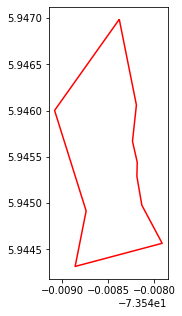

In [44]:
# Carga del archivo .kml
df_polygon = gpd.read_file("1.kml",driver='KML')
df_polygon = df_polygon.to_crs('EPSG:4326')

# Pintar el polígono seleccionado
fig, ax = plt.subplots(figsize=(5,5))
df_polygon.boundary.plot(ax=ax,color='red')

# Obtención de la geometría del polígono del GeoDataFrame
geometry_predio = df_polygon['geometry'][0]

# Obtención de los límites del cuadrado que enmarca el polígono
minx, miny, maxx, maxy = geometry_predio.bounds

# Aumento del aŕea del cuadrado para "EPSG:32719"
# 2 kilómetros
buffer = 0.001

minx = minx - buffer
miny = miny - buffer
maxx = maxx + buffer
maxy = maxy + buffer

# Parámetros de área a ser consultada
set_study_area_lat = (miny,maxy)
set_study_area_lon = (minx,maxx)

print(set_study_area_lat)
print(set_study_area_lon)

(Opción 2) Consultar un área a partir de un punto

In [ ]:
# # Definición de las coordenadas del punto
# central_lat = 5.672302
# central_lon = -73.257158

# # Aumento del aŕea del cuadrado para "EPSG:32719"
# # 2 kilómetros
# buffer = 0.001

# # Calculo del cuadro delimitador (bounding box) para el área de estudio
# set_study_area_lat = (central_lat - buffer, central_lat + buffer)
# set_study_area_lon = (central_lon - buffer, central_lon + buffer)

# print(set_study_area_lat)
# print(set_study_area_lon)

Carga de información en el Open Data Cube

In [18]:
dc = datacube.Datacube(app="Cana")

dataset = dc.load(
    product="s2_sen2cor_ard_granule_EO3",
    longitude=(-73.54908046294513, -73.54791072556434),
    latitude=(5.944315624121977, 5.94698787384077),
    time=('2020-04-10', '2020-04-18'),
    measurements=["red","blue","green","nir","swir1","swir2","scl"],
    crs="EPSG:4326",
    output_crs="EPSG:4326",
    resolution=(-0.00008983111,0.00008971023)
)

dataset

<xarray.Dataset>
Dimensions:      (latitude: 30, longitude: 14, time: 4)
Coordinates:
  * time         (time) datetime64[ns] 2020-04-10T20:51:20 ... 2020-04-18T21:...
  * latitude     (latitude) float64 5.947 5.947 5.947 ... 5.945 5.944 5.944
  * longitude    (longitude) float64 -73.55 -73.55 -73.55 ... -73.55 -73.55
    spatial_ref  int32 4326
Data variables:
    red          (time, latitude, longitude) uint16 0 0 0 0 ... 1472 1334 1290
    blue         (time, latitude, longitude) uint16 0 0 0 0 ... 1290 1274 1074
    green        (time, latitude, longitude) uint16 0 0 0 0 ... 1664 1522 1406
    nir          (time, latitude, longitude) uint16 0 0 0 0 ... 3664 3494 3244
    swir1        (time, latitude, longitude) uint16 0 0 0 0 ... 2962 2776 2776
    swir2        (time, latitude, longitude) uint16 0 0 0 0 ... 2001 1621 1621
    scl          (time, latitude, longitude) uint8 0 0 0 0 0 0 0 ... 5 5 5 5 4 4
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

## 3. Características de la imágen obtenida

La función `dc.load` del open datacube recibe una consulta y retorna una estructuar de datos llamada `xarray.Dataset` que contiene toda la información que fue solicitada en la consulta. Un `xarray.Dataset` presenta las siguientes propiedades.

<img src="https://raw.githubusercontent.com/DonAurelio/open-datacube-bac-training/main/docs/xarray.png" alt="xarray.Dataset" width="60%">

**Dimensiones (`Dimensions`)**

Las dimensiones identifican el número de pasos de tiempo devueltos en la búsqueda (`time: 4`), así como el número de píxeles en las dimensiones `latitude` y `longitude`. Además, indica cómo están organizados los datos en las diferentes dimensiones.

**Coordenadas (`Coordinates`)**

* `time` identifica la fecha atribuida a cada intervalo de tiempo devuelto como resultado de la consulta.
* `latitude` y `longitude` son las coordenadas de cada píxel dentro de los límites espaciales de la consulta.

<img src="https://raw.githubusercontent.com/DonAurelio/open-datacube-bac-training/main/docs/numpy_array_shape.png" alt="xarray.Dataset" width="60%">

**Variables de datos (`Data variables`)**

Por cada banda (*measurement*) que representa la información espectral de la imágen hay una *variable de datos*. En el ejemplo anterior, las variables de datos obtenidas son: `red`,`blue`,`green`,`nir`,`swir1`,`swir2`,`scl`. Cada variable de datos es un arreglo de tres dimensiones de tipo `xarray.DataArray`.

**Atributos (`Attributes`)**

* `crs` identifica el sistema de coordenadas de referencia de la imágen obtenida.


### Explolación de las dimensiones

La propiedad `dims` permite visualizar las dimensiones dle dataset.

In [19]:
dataset.dims

Frozen(SortedKeysDict({'time': 4, 'latitude': 30, 'longitude': 14}))

> **TODO:** ¿Cuántos periodos de tiempo retornó la consulta? ¿Cuántos píxeles retorno la consulta?

### Exploración de las coordenadas

La propiedad `coords`permite visualizar las coordenadas. Las coordenadas pueden ser vistas como las etiquetas de los ejes de un cubo de tres dimensiones. En este caso, las dimensiones son `time`, `longitude`, `latitude`.

In [20]:
dataset.coords

Coordinates:
  * time         (time) datetime64[ns] 2020-04-10T20:51:20 ... 2020-04-18T21:...
  * latitude     (latitude) float64 5.947 5.947 5.947 ... 5.945 5.944 5.944
  * longitude    (longitude) float64 -73.55 -73.55 -73.55 ... -73.55 -73.55
    spatial_ref  int32 4326

Para conocer de forma explícita qué periodos de tiempo retorno como resultado la consulta

In [21]:
dataset.coords['time']

<xarray.DataArray 'time' (time: 4)>
array(['2020-04-10T20:51:20.000000000', '2020-04-13T21:14:35.000000000',
       '2020-04-15T21:07:07.000000000', '2020-04-18T21:14:50.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2020-04-10T20:51:20 ... 2020-04-18T21:...
    spatial_ref  int32 4326
Attributes:
    units:    seconds since 1970-01-01 00:00:00

Para conocer de forma explícita las coordendas de longitud

In [22]:
dataset.coords['longitude']

<xarray.DataArray 'longitude' (longitude: 14)>
array([-73.549067, -73.548977, -73.548887, -73.548798, -73.548708, -73.548618,
       -73.548528, -73.548439, -73.548349, -73.548259, -73.54817 , -73.54808 ,
       -73.54799 , -73.5479  ])
Coordinates:
  * longitude    (longitude) float64 -73.55 -73.55 -73.55 ... -73.55 -73.55
    spatial_ref  int32 4326
Attributes:
    units:       degrees_east
    resolution:  8.971023e-05
    crs:         EPSG:4326

Para conocer de forma explícita las coordendas de latitud

In [23]:
dataset.coords['latitude']

<xarray.DataArray 'latitude' (latitude: 30)>
array([5.946954, 5.946864, 5.946775, 5.946685, 5.946595, 5.946505, 5.946415,
       5.946325, 5.946236, 5.946146, 5.946056, 5.945966, 5.945876, 5.945786,
       5.945697, 5.945607, 5.945517, 5.945427, 5.945337, 5.945247, 5.945158,
       5.945068, 5.944978, 5.944888, 5.944798, 5.944708, 5.944619, 5.944529,
       5.944439, 5.944349])
Coordinates:
  * latitude     (latitude) float64 5.947 5.947 5.947 ... 5.945 5.944 5.944
    spatial_ref  int32 4326
Attributes:
    units:       degrees_north
    resolution:  -8.983111e-05
    crs:         EPSG:4326

### Exploración de las variables de datos

La información espectral de una imágen satelital es organizada por el Open Data Cube en *variables de datos*. Cada variable de datos contiene la información de una única banda. La información de cada banda es organizada en un arreglo de tres dimensiones. 

Para acceder a la información espectral de la banda `blue` podemos usar la expresión mostrada a continuación.

In [24]:
dataset.blue

<xarray.DataArray 'blue' (time: 4, latitude: 30, longitude: 14)>
array([[[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[ 515,  493,  481, ...,  500,  480,  511],
        [ 495,  487,  474, ...,  501,  494,  491],
        [ 504,  491,  437, ...,  419,  440,  434],
        ...,
        [ 465,  479,  607, ...,  548,  556,  540],
        [ 479,  495,  695, ...,  586,  519,  480],
        [ 454,  467,  636, ...,  518,  469,  466]],

       [[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[ 866,  833,  868, ...,  437,  445,  463],
        [1015,  858,  819, ...,  466,  465,  445],
        [1086,  959,  886, ...,  692,  562,  494],
        ...,
        [1522, 1622, 1798, ..., 1104, 1292, 1388],
        [1582, 1680, 1814, ..., 1158, 1272, 1232],
        [1616, 1704, 1820, ..., 1290, 1274, 1074]]], dtype=uint16)
Coordinates:
  * time         (time) datetime64[ns] 2020-04-10T20:51:20 ... 2020-04-18T21:...
  * latitude     (latitude) float64 5.947 5.947 5.947 ... 5.945 5.944 5.944
  * longitude    (longitude) float64 -73.55 -73.55 -73.55 ... -73.55 -73.55
    spatial_ref  int32 4326
Attributes:
    units:         reflectance
    nodata:        0
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

Dado que cada variable de datos es un arreglo de tres dimensiones, es posible indexar la información del mismo. Es importante conocer el orden de los ejes para determinar de antemáno que información se mostrará al indixar una variable de datos.

Por ejemplo, puedo obtener la primera imágen en el tiempo para la banda `blue`. 

In [25]:
dataset.blue[0]

<xarray.DataArray 'blue' (latitude: 30, longitude: 14)>
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint16)
Coordinates:
    time         datetime64[ns] 2020-04-10T20:51:20
  * latitude     (latitude) float64 5.947 5.947 5.947 ... 5.945 5.944 5.944
  * longitude    (longitude) float64 -73.55 -73.55 -73.55 ... -73.55 -73.55
    spatial_ref  int32 4326
Attributes:
    units:         reflectance
    nodata:        0
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

En la mayoría de los casos es deseable visualizar los valores en la banda blue para la imagen seleccionada para un periodo de tiempo. A continuación, se mustra cómo obtener una imágen para la banda `blue` para un periodo de tiempo seleccionado.

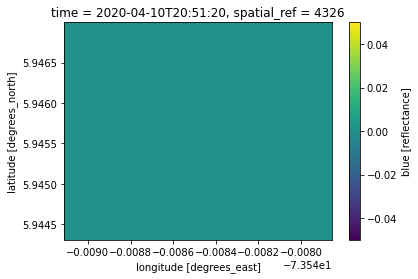

In [26]:
dataset.blue[0].plot()

De la misma forma, podría ver el valor para la banda `blue` de un único píxel. Los valores entre corchetes `[1,0,0]` se interpretan considerando el orden de las coordenadas. En este caso:

* la primera coordenada es el tiempo (`time`) de modo que en la matrix se ha seleccionado el periodo de tiempo `1`. 
* la segúnda coodenada es la latitud (`latitude`) de modo que en la matrix se ha selccionado la latitud `0`
* la tercera coordenada es la longitud (`longitude`) así, la longitud seleccionada es `0`

In [27]:
dataset.blue[1,0,0]

<xarray.DataArray 'blue' ()>
array(515, dtype=uint16)
Coordinates:
    time         datetime64[ns] 2020-04-13T21:14:35
    latitude     float64 5.947
    longitude    float64 -73.55
    spatial_ref  int32 4326
Attributes:
    units:         reflectance
    nodata:        0
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

> **TODO:**  Realice el proceso de **Exploración de variables de datos** para las variables (bandas) restantes `red`,`green`,`nir`,`swir1`,`swir2` y `scl`. Cree una nueva celda para cada ejemplo. Puede apoyarse en el ejemplo de exploración de la banda `blue` mostrado anteriormente.

### Exploración de atributos

Entre los atributos que hace parte de los metadatos dela imágen, se muestra el sistema de referencia de coordenadas (CRS) de la imágen obtenida a partir del Open Data Cube. Una de las bondades del Open Data Cube es que permite obtener la información de las imágenes en diferentes sistemas de coordendas y en diferentes dimensiones.

In [28]:
dataset.crs

'EPSG:4326'

## 4. Aplicación de un algoritmo de análisis

El Índice de Vegetación de Diferencia Normalizada (NDVI) cuantifica la salud de la vegetación midiendo la diferencia entre el nir del infrarrojo cercano (que la vegetación refleja fuertemente) y la luz roja (que la vegetación absorbe). Los valores de este índice permiten hacer algúnas interpretaciones de la cobertura.

* Valores negativos: indicio de que hay agua.
* Valores cercanos a 1: existe una alta posibilidad de que la cobertura observada presente hojas verdes densas.
* Valores cercanos a 0: no hay hojas verdes e incluso podría ser una zona urbanizada.

<img src="https://raw.githubusercontent.com/DonAurelio/open-datacube-bac-training/main/docs/ndvi_1.png" alt="Deparatemento de Ingeniería de Sistemas y Computación, Universidad de los Andes" width="40%">

Agracias a la forma en que el Open Data Cube organiza los información expectral de una imágen, es posible realizar calculos como el NDVI de manera sencilla.

In [30]:
dataset['ndvi'] = (dataset.nir - dataset.red) / (dataset.nir + dataset.red)
dataset

<xarray.Dataset>
Dimensions:      (latitude: 30, longitude: 14, time: 4)
Coordinates:
  * time         (time) datetime64[ns] 2020-04-10T20:51:20 ... 2020-04-18T21:...
  * latitude     (latitude) float64 5.947 5.947 5.947 ... 5.945 5.944 5.944
  * longitude    (longitude) float64 -73.55 -73.55 -73.55 ... -73.55 -73.55
    spatial_ref  int32 4326
Data variables:
    red          (time, latitude, longitude) uint16 0 0 0 0 ... 1472 1334 1290
    blue         (time, latitude, longitude) uint16 0 0 0 0 ... 1290 1274 1074
    green        (time, latitude, longitude) uint16 0 0 0 0 ... 1664 1522 1406
    nir          (time, latitude, longitude) uint16 0 0 0 0 ... 3664 3494 3244
    swir1        (time, latitude, longitude) uint16 0 0 0 0 ... 2962 2776 2776
    swir2        (time, latitude, longitude) uint16 0 0 0 0 ... 2001 1621 1621
    scl          (time, latitude, longitude) uint8 0 0 0 0 0 0 0 ... 5 5 5 5 4 4
    ndvi         (time, latitude, longitude) float64 nan nan ... 0.4474 0.431
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

Los resultados del NDVI calculado para todos los periodos de tiempo retornados en la consulta del open data cube se muestra a continuación.

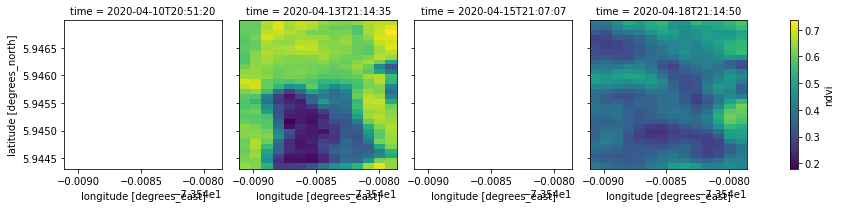

In [31]:
dataset.ndvi.plot(col='time',col_wrap=4)

Para interpretar los valores del NDVI puede usar los rangos descritos en la imágen mostrada a continuación.

<img src="https://raw.githubusercontent.com/DonAurelio/open-datacube-bac-training/main/docs/ndvi_2.jpg" alt="Deparatemento de Ingeniería de Sistemas y Computación, Universidad de los Andes" width="80%">

## 5. Visualización de resultados

La visualización es uno de los procesos más importantes en el proceso de análisis de una imágen satelital. El open data cube facilita en todos los aspectos el análisis de series de tiempo. Es decir cómo cambiar la información espectral mostrada por la cobertura terrestre en el tiempo. A continuación aprenderémos a desarrollar diferentes tipos de visualizaciones para las imágenes obtenidas a partir de una consulta. 

Imágen en `true color`

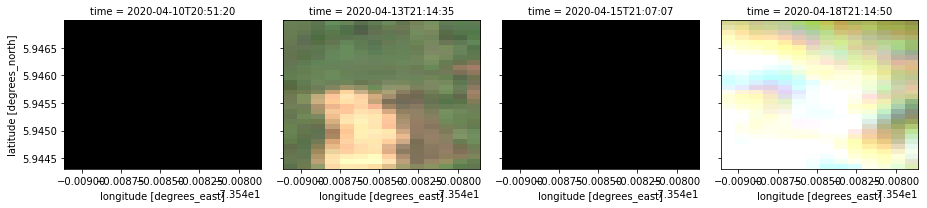

In [34]:
rgb = dataset[["red","green","blue"]].to_array(dim='color')
rgb = rgb.transpose(*(rgb.dims[1:]+rgb.dims[:1]))  # make 'color' the last dimension
img = rgb.plot.imshow(col='time',col_wrap=4,add_colorbar=False,vmin=0,vmax=1500)

Imágen en `true color` con el polígono que se empleó para delimitar el área de consulta

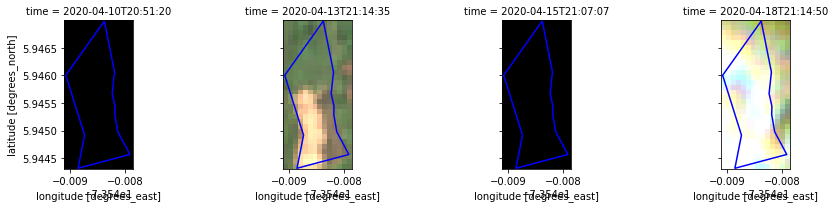

In [47]:
rgb = dataset[["red","green","blue"]].to_array(dim='color')
rgb = rgb.transpose(*(rgb.dims[1:]+rgb.dims[:1]))  # make 'color' the last dimension
img = rgb.plot.imshow(col='time',col_wrap=4,add_colorbar=False,vmin=0,vmax=1500)

for axes in img.axes.flat:
    df_polygon.boundary.plot(ax=axes,markersize=20,color='blue',marker='o')
plt.show()

Cambio en el tiempo de la información espectral únicamente de la banda `red`.

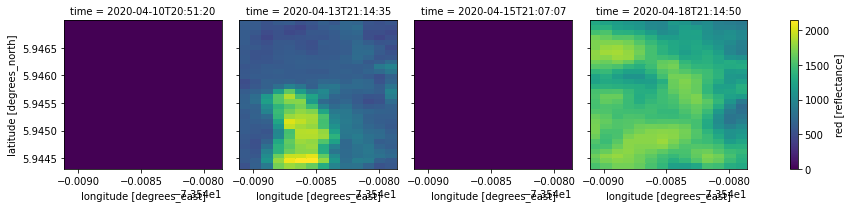

In [39]:
dataset.red.plot(col='time',col_wrap=4)

Para cambiar el rango de colores de la visualización mostrada usamos el parámetro `cmap` y le indicamos un rango de color válido. El listado de colores válidos lo puede encontrar [aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

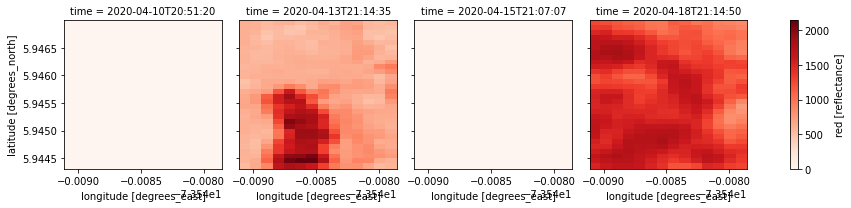

In [40]:
dataset.red.plot(col='time',col_wrap=4,cmap='Reds')

Cambio en el tiempo de la información espectral únicamente de la banda `blue`.

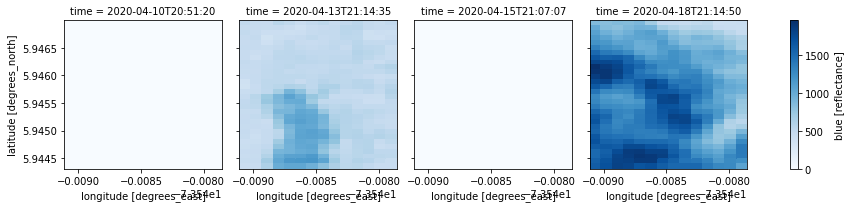

In [42]:
dataset.blue.plot(col='time',col_wrap=4, cmap='Blues')

> **TODO:**  Realice el proceso de **Visualización** para las variables (bandas) restantes `green`,`nir`,`swir1`,`swir2` y `scl`. Cree una nueva celda para cada ejemplo. Puede apoyarse en el ejemplo de exploración de la banda `blue` mostrado anteriormente. Use los colores `'Greens'` para la banda `green`; para las demás bandas no cambie los colores.